In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
from collections import Counter

## Code 3.1

In [2]:
PrPV = .95
PrPM = .01
PrV = .001
PrP  = PrPV*PrV + PrPM*(1-PrV)
PrVP = PrPV*PrV / PrP
PrVP

0.08683729433272395

## Code 3.2

In [3]:
def grid_approx(grid_samp = 1000, n_trials = 9, n_success = 6):
    """Grid approximation for Bayes

    The posterior is a probability distribution that is proportional to the plausability of that parameter value.
    Here the parameter value is our p_grid, so p_grid values that are more likely are going to have be weighted
    higher in the posterior or probability distribution 
    
    :Params
    -------------------
    grid_samp - how many samples to take for our grid
    n_trials - how many times to did we spin the globe
    n_success - how many times did we land on water
    
    :Returns
    -------------------
    p_grid - the grid of prior paramter values supplied
    posterior - the posterior distribution or how plausible it is to see the data we saw given the parameter
    
   """
    # grid of probability values
    p_grid = np.linspace(0,1,num = grid_samp)
    
    #assume the prior is uniform distribution of 1
    prior = np.repeat(1,grid_samp)
   
    #likelihood we would see what we see given diffent p_values
    likelihood = stats.binom.pmf(n_success,n_trials,p_grid)
    unstd_post = likelihood * prior
    
    # post distribution
    post = unstd_post / np.sum(unstd_post)
    
    return p_grid, post

p_grid, posterior = grid_approx()

## Code 3.3

In [4]:
# we are going to choose n number of samples from the grid in relation to it's posterior probability
# What is the posterior? It's a probability distribution of our p_grid
# as the book states, imagine the posterior is a bucket full of parameter values, p_grid values
# within each bucket, each value exists in proportion to its posterior probability,
# such that values near the peak are much more common than those in the tails
samples = np.random.choice(p_grid,size = 10000,replace = True,p=posterior)

## Code 3.4

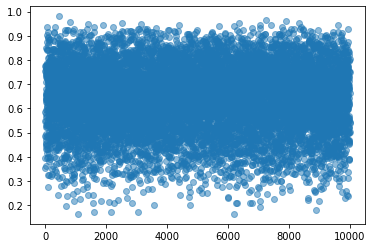

In [5]:
plt.plot(samples, alpha = 0.5, marker = 'o', linestyle = '')

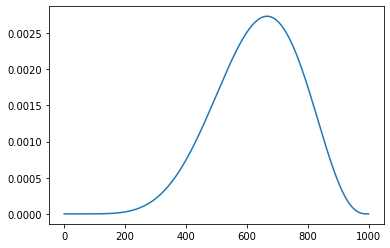

In [6]:
# the posterior is nothing more than a probability distribution.
# In this case it's the probability distribution of the proportion of water on the earth
plt.plot(posterior)
plt.show()

## Code 3.5

Text(0.5, 0, 'proportion of water (w)')

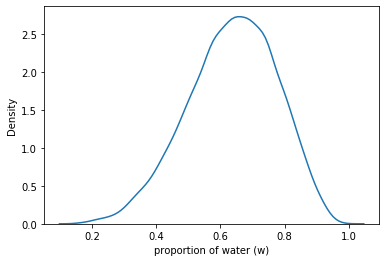

In [7]:
sns.distplot(samples, kde = True, hist=False)
plt.ylabel('Density')
plt.xlabel('proportion of water (w)')

## Code 3.6

In [8]:
np.sum(posterior[p_grid < .5])

0.17187458902022873

## Code 3.7

In [9]:
np.sum(samples < .5)/1e4

0.1683

## Code 3.8

In [10]:
np.sum((samples > .5) & (samples < .75))/len(samples)

0.6134

## Code 3.9 & 3.10

In [11]:
np.percentile(samples, 80)

0.7587587587587588

## Code  & 3.10

In [12]:
np.percentile(samples, [10,90])

array([0.44944945, 0.81081081])

# Code 3.11

In [13]:
water = 3
n_tosses = 3
n = 1000

p_grid2, posterior2 = grid_approx(grid_samp = n,n_trials=n_tosses, n_success = water)
samples2 = np.random.choice(p_grid2,size = 10000,replace = True,p=posterior2)

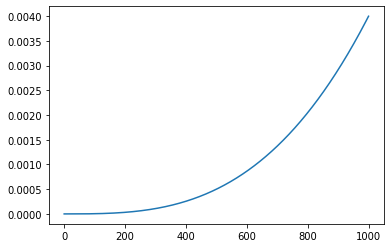

In [14]:
plt.plot(posterior2)
plt.show()

# Code 3.12

In [15]:
np.percentile(samples2, [25,75])

array([0.70670671, 0.92992993])

# Code 3.13

In [16]:
az.hpd(samples2, credible_interval=0.5)

array([0.84084084, 1.        ])

## Code 3.14

In [17]:
p_grid[posterior2 == np.max(posterior2)]

array([1.])

## Code 3.15

In [18]:
stats.mode(samples2)[1]

array([53])

## Code 3.16

In [19]:
np.median(samples2), np.mean(samples2)

(0.8408408408408409, 0.8004164164164164)

## Code 3.17

In [21]:
np.sum(posterior2*np.abs(.5-p_grid))

0.31287518749981214

## Code 3.18

In [22]:
loss = [np.sum(posterior2*np.abs(i-p_grid2)) for i in p_grid2]

Text(0, 0.5, 'loss')

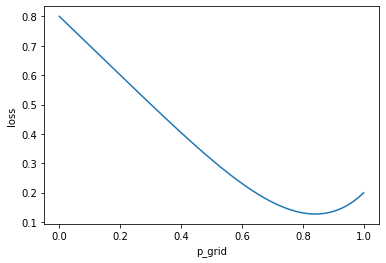

In [23]:
plt.plot(p_grid2,loss)
plt.xlabel('p_grid')
plt.ylabel('loss')

## Code 3.19

In [24]:
p_grid2[np.argmin(loss)]

0.8408408408408409

## Code 3.20

In [25]:
stats.binom.pmf(np.arange(0,3),2,p=0.7)

array([0.09, 0.42, 0.49])

## Code 3.21

In [26]:
stats.binom.rvs(size = 1, n = 2, p=.7)

array([1])

## Code 3.22

In [27]:
stats.binom.rvs(size = 10, n = 2, p=.7)

array([2, 2, 1, 1, 2, 1, 1, 2, 1, 1])

## Code 3.23

In [28]:
dummy_w = stats.binom.rvs(size = int(1e5), n = 2, p=.7)
Counter(dummy_w)

Counter({2: 48887, 0: 9004, 1: 42109})

## Code 3.24

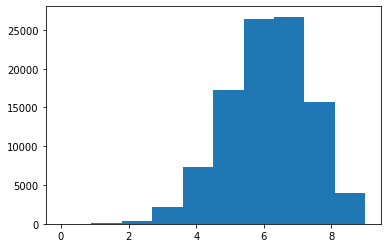

In [29]:
dummy_w = stats.binom.rvs(size = int(1e5), n = 9, p=.7)
plt.hist(dummy_w)
plt.show()

## Code 3.25

In [30]:
w = stats.binom.rvs(size = int(1e4), n = 9, p=.6)


## Code 3.26

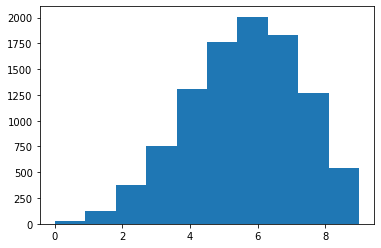

In [31]:
w = stats.binom.rvs(size = int(1e4), n = 9, p=samples)
plt.hist(w)
plt.show()

## Code 3.27

In [32]:
p_grid_prac, post_prac = grid_approx(grid_samp=1000, n_trials= 9, n_success=6)
samp_prac = np.random.choice(p_grid_prac,size = int(1e4),replace = True,p = post_prac)

In [33]:
np.sum(post_prac < np.percentile(post_prac,20)), np.sum(post_prac > np.percentile(post_prac,80))

(200, 200)

# Chapter 3 Practice questions

## Easy

### 3E1

In [34]:
np.sum(samp_prac < .2) / len(samp_prac)

0.0007

### 3E2

In [35]:
np.sum(samp_prac > .8) / len(samp_prac)

0.1205

### 3E3

In [36]:
np.sum((samp_prac < .8) & (samp_prac > .2)) / len(samp_prac)

0.8788

### 3E4

In [37]:
np.percentile(samp_prac, 20)

0.5185185185185185

### 3E5

In [38]:
np.percentile(samp_prac, 80)

0.7607607607607607

### 3E6

In [39]:
az.hpd(samp_prac, credible_interval=0.66)

array([0.52852853, 0.7987988 ])

### 3E7

In [40]:
np.percentile(samp_prac,[(((1-.66)/2))*100,(1-((1-.66)/2))*100] )

array([0.5025025 , 0.77477477])

### 3M1

In [41]:
n_water = 8
n_tosses = 15
p_grid3, posterior3 = grid_approx(n_trials=n_tosses,n_success=n_water)

### 3M2

In [42]:
samples3 = np.random.choice(p_grid3,size = int(1e4),replace=True,p = posterior3)
az.hpd(samples3, credible_interval=.9)

array([0.33733734, 0.72272272])

### 3M3

In [43]:
post_check= stats.binom.rvs(size = len(samples3), n = 15, p=samples3)
np.mean(post_check == 8)

0.1458

### 3M4

In [44]:
post_check2 = stats.binom.rvs(size = len(samples3), n = 9, p=samples3)
np.mean(post_check2 == 6)

0.178

### 3M5

In [45]:
grid_samp = 1000
n_success = 8
n_trials = 15

# grid of probability values
p_grid = np.linspace(0,1,num = grid_samp)
p_grid = np.where(p_grid < .5, 0, p_grid)

#assume the prior is uniform distribution of 1
prior = np.repeat(1,grid_samp)

#likelihood we would see what we see given diffent p_values
likelihood = stats.binom.pmf(n_success,n_trials,p_grid)
unstd_post = likelihood * prior

# post distribution
posterior4 = unstd_post / np.sum(unstd_post)

In [46]:
samples_3m5 = np.random.choice(p_grid, size = int(grid_samp),replace = True, p = posterior4)
az.hpd(samples_3m5, credible_interval=.9)

array([0.5005005 , 0.71671672])

In [47]:
post_check_3m5 = stats.binom.rvs(size = len(samples_3m5), n = n_trials, p = samples_3m5)
np.mean(post_check_3m5 == 8)

0.151

In [48]:
n_trials = 9
n_success = 6
post_check_3m5 = stats.binom.rvs(size = len(samples_3m5), n = n_trials, p = samples_3m5)
np.mean(post_check_3m5 == 6)

0.234

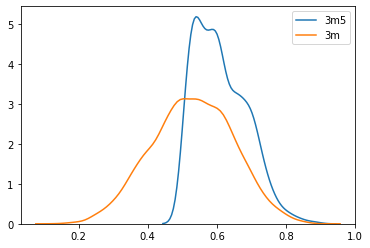

In [65]:
sns.distplot(samples_3m5,hist = False,label = '3m5')
sns.distplot(samples3,hist = False,label = '3m')

### 3H1

In [66]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0, 
                   0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,
                   0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,
                   1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])

birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
                   1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,
                   1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,
                   0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0])

In [88]:
tot_boy = np.sum(birth1) + np.sum(birth2)
tot_trials = np.sum([len(birth1), len(birth2)])
tot_boy_perc = tot_boy/tot_trials

In [72]:
p_grid_boy, post_boy = grid_approx(grid_samp=1000, n_trials=tot_trials,n_success=tot_boy)

In [76]:
samples_boy = np.random.choice(p_grid_boy,size = 10000,replace = True,p=post_boy)

### 3H2

In [77]:
az.hpd(samples_boy, credible_interval=.5)

array([0.53153153, 0.57857858])

In [78]:
az.hpd(samples_boy, credible_interval=.89)

array([0.5005005 , 0.61261261])

In [79]:
az.hpd(samples_boy, credible_interval=.97)

array([0.47947948, 0.63163163])

### 3H3

In [80]:
post_check_boy = stats.binom.rvs(size = 10000, n = 200, p=samples_boy)

In [87]:
# utilizing some of the model checking methods
# we should expect the mean and median to be somewhere near our empirical value
# we see that it is
print(tot_boy/tot_trials)
print(np.mean(post_check_boy))
print(np.median(post_check_boy))

0.555
110.9611
111.0


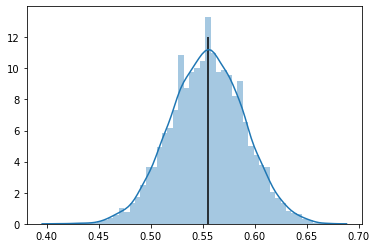

In [93]:
# we now need to check to ensure our rate is equivalent as well
# again our vertical line appears right in the middle
# this tells us that our model checks out
# as the book states we should find ways in which the model fails though
# at the end of the day it's a model and all models are wrong
sns.distplot(samples_boy)
plt.vlines(x = tot_boy_perc, ymin=0,ymax=12)

### 3H4

In [94]:
p_grid_3h4, post_3h4 = grid_approx(grid_samp=1000, n_trials=len(birth1),n_success=np.sum(birth1))

In [100]:
samples_3h4 = np.random.choice(p_grid_3h4,size = 10000,replace = True,p=post_3h4)
print(np.mean(samples_3h4),np.median(samples_3h4))

0.5090745745745746 0.5095095095095095


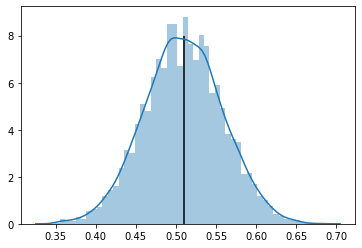

In [99]:
sns.distplot(samples_3h4)
plt.vlines(x=(np.sum(birth1)/len(birth1)), ymin = 0, ymax = 8)

### 3H5

In [116]:
# if the events are independent we should be able to supply the probabilities of the boys
# and it should NOT affect the outcome of boys that come after girls
# compare 10k simulated counts of boys to only second birth that followed girls
# to do it correctly you need to count number of first borns who were girls
# simulate that many births 10k

# boys which come after girls
boys_aft_girls = np.sum(birth2[birth1 == 0])
# number of first born who were girls
girl_fst = np.sum(birth1 == 0)
tot_girl_fst = len(birth2[birth1 == 0])

In [136]:
# simulate 10k times assume boys probability because if they are independent that we sould expect
# it to be the same because one isn't influencing the other
n_trials = 10000
b1g1_samp = stats.binom.rvs(size = n_trials, n = girl_fst, p=samples_boy)

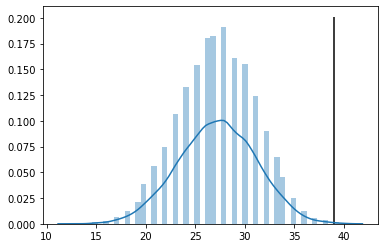

In [134]:
sns.distplot(b1g1_samp)
plt.vlines(x=boys_aft_girls,ymin = plt.ylim()[0], ymax=plt.ylim()[1])